In [1]:
from fastai.tabular.all import *

In [97]:
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import re

### Part 1 of Evaluation

In [4]:
s='{"orders":[{"id":1},{"id":2},{"id":3},{"id":4},{"id":5},{"id":6},{"id":7},{"id":8},{"id":9},{"id":10},{"id":11},{"id":648},{"id":649},{"id":650},{"id":651},{"id":652},{"id":653}],"errors":[{"code":3,"message":"[PHP Warning #2] count(): Parameter must be an array or an object that implements Countable (153)"}]}'

In [5]:
pattern=re.compile(r'(?<=:)\d+')

In [6]:
finds=pattern.finditer(s)

In [7]:
for find in finds:
    print(find.group(0))

1
2
3
4
5
6
7
8
9
10
11
648
649
650
651
652
653
3


## Part 2 of Evaluation

### Data Visualization

In [8]:
train_data=pd.read_csv('train_data_evaluation_part_2.csv')

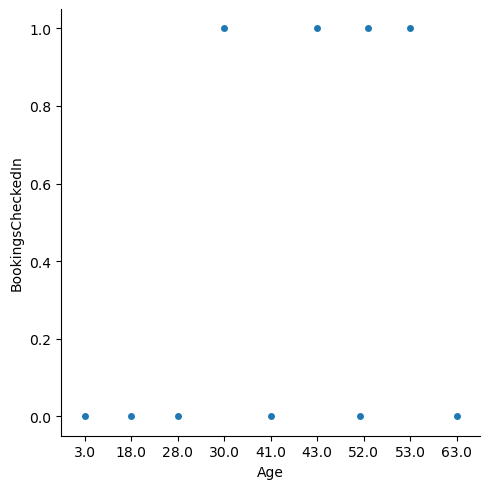

In [99]:
sns.catplot(data=train_data[30:40], x="Age", y="BookingsCheckedIn")

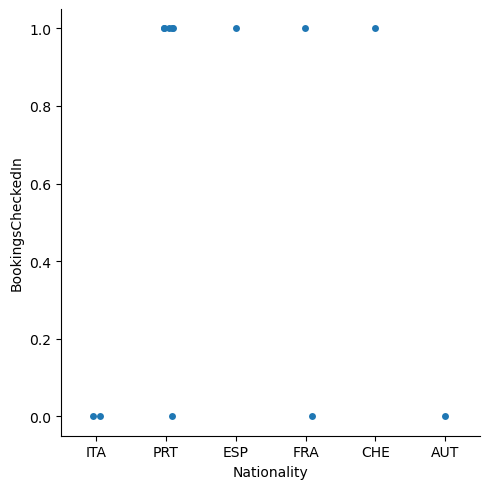

In [103]:
sns.catplot(data=train_data[749:762], x="Nationality", y="BookingsCheckedIn")

<AxesSubplot:xlabel='BookingsCheckedIn', ylabel='AverageLeadTime'>

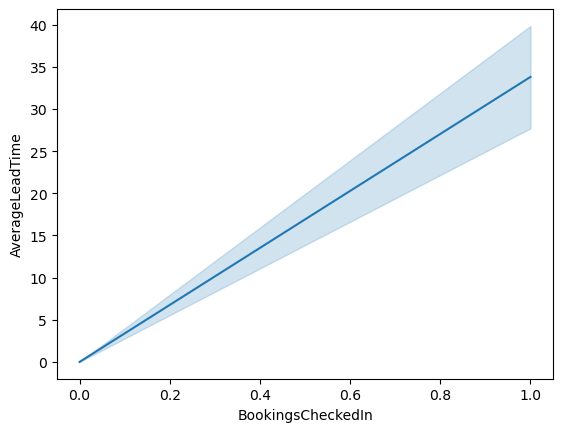

In [105]:
sns.lineplot(data=train_data[260:400], x="BookingsCheckedIn", y="AverageLeadTime")

In [9]:
test_data=pd.read_csv('test_data_evaluation_part2.csv')

In [10]:
train_data.isna().sum()

Unnamed: 0                 0
ID                         0
Nationality                0
Age                     3746
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

### Data Wrangling

##### As null values account for less than 5% of the data, I will drop the rows with NaN values. I also drop the duplicate id column

In [11]:

train_data.dropna(inplace=True)
train_data.drop('Unnamed: 0',axis='columns',inplace=True)

In [51]:
train_data[train_data['AverageLeadTime']==-1]

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
29370,29371,USA,24.0,580,-1,77.49,3.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
51361,51362,CHN,32.0,268,-1,129.00,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58639,58640,FRA,56.0,209,-1,149.00,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58646,58647,FRA,61.0,209,-1,149.00,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58660,58661,FRA,60.0,209,-1,149.00,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
60574,60575,ESP,45.0,195,-1,159.00,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
62673,62674,USA,69.0,178,-1,95.20,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
68469,68470,GBR,45.0,134,-1,282.00,24.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
72692,72693,BRA,30.0,104,-1,209.00,2.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_data['BookingsCheckedIn']=train_data['BookingsCheckedIn'].apply(func=ohe_target)

In [14]:
train_data['BookingsCheckedIn'].value_counts()

1    60263
0    18571
Name: BookingsCheckedIn, dtype: int64

In [78]:
def binary_target(y):
    if y>0:
        y=1
    else:
        y=0
    return y

In [49]:
train_data.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,...,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000,78834.000000
mean,41822.070908,45.468554,451.966068,67.171766,303.826430,68.250650,0.001865,0.000584,0.764429,4.717140,...,0.000888,0.002879,0.001801,0.012951,0.356344,0.143656,0.000317,0.003615,0.000127,0.090595
std,23725.442257,16.526276,308.586020,88.159066,368.427814,112.780841,0.066319,0.028487,0.424358,4.581843,...,0.029785,0.053584,0.042403,0.113065,0.478921,0.350743,0.017805,0.060018,0.011262,0.287035
min,1.000000,-11.000000,12.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21428.250000,34.000000,179.000000,0.000000,69.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41877.500000,46.000000,394.000000,31.000000,237.600000,40.500000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62432.750000,57.000000,709.000000,104.000000,409.000000,89.000000,0.000000,0.000000,1.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82580.000000,122.000000,1095.000000,588.000000,9682.400000,7730.250000,9.000000,3.000000,1.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### There are 188 unique countries. However, I am ony considering only the countries in the test set as they account for almost all the data in the train set.

In [15]:
train_data['Nationality'].value_counts()

FRA    12307
DEU    10164
GBR     8610
PRT     7638
ESP     4863
       ...  
GNQ        1
GIN        1
SWZ        1
SOM        1
NPL        1
Name: Nationality, Length: 188, dtype: int64

In [16]:
mod_train_data=train_data.set_index('Nationality').loc[test_data['Nationality'].unique()].reset_index().drop('ID',axis='columns')

In [23]:
mod_train_data=mod_train_data[mod_train_data['AverageLeadTime']!=-1]

In [54]:
mod_train_data.columns

Index(['Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

### Setting up pre-processing for categorical and continuous variables

In [61]:
cat_names=['Nationality','BookingsNoShowed','MarketSegment','DistributionChannel','SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom']


cont_names=['Age','DaysSinceCreation','AverageLeadTime','LodgingRevenue', 'OtherRevenue','BookingsCanceled','PersonsNights','RoomNights',
           'DaysSinceLastStay', 'DaysSinceFirstStay']

procs=[Categorify,Normalize]

y_names='BookingsCheckedIn'

y_block=CategoryBlock()

In [55]:
splits = RandomSplitter()(range_of(mod_train_data))

In [56]:
splits

((#60234) [53456,56018,2458,47881,1368,42745,20489,15060,71151,57437...],
 (#15058) [5386,51090,23347,57567,64702,62405,22783,41837,17127,67557...])

In [62]:
to = TabularPandas(mod_train_data, procs=procs, cat_names=cat_names, cont_names=cont_names,
                   y_names=y_names, y_block=y_block, splits=splits)

### Creating DataLoaders for training and validation

In [63]:
dls = to.dataloaders(bs=64,)

Using embeddings for categorical variables. 

In [66]:
def get_emb_sz(to, sz_dict=None):
    "Get default embedding size from `TabularPreprocessor` `proc` or the ones in `sz_dict`"
    return [emb_sz_rule(len(to.classes[n])) for n in to.cat_names]

def emb_sz_rule(n_cat):
    "Rule of thumb to pick embedding size corresponding to `n_cat`"
    return n_cat,min(600, round(1.6 * n_cat**0.56))

In [67]:
emb_szs = get_emb_sz(to)

In [70]:
cont_data_len=len(to.cont_names)

### Instantiating the Model and Learner

In [72]:
net = TabularModel(emb_szs=emb_szs, n_cont=cont_data_len, out_sz=2, layers=[200,100])

In [73]:
net

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(50, 14)
    (1): Embedding(5, 4)
    (2): Embedding(8, 5)
    (3): Embedding(5, 4)
    (4): Embedding(3, 3)
    (5): Embedding(3, 3)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
    (10): Embedding(3, 3)
    (11): Embedding(3, 3)
    (12): Embedding(3, 3)
    (13): Embedding(3, 3)
    (14): Embedding(3, 3)
    (15): Embedding(3, 3)
    (16): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=76, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-0

In [74]:
learn = tabular_learner(dls, [200,100], metrics=accuracy)

SuggestedLRs(valley=0.0020892962347716093)

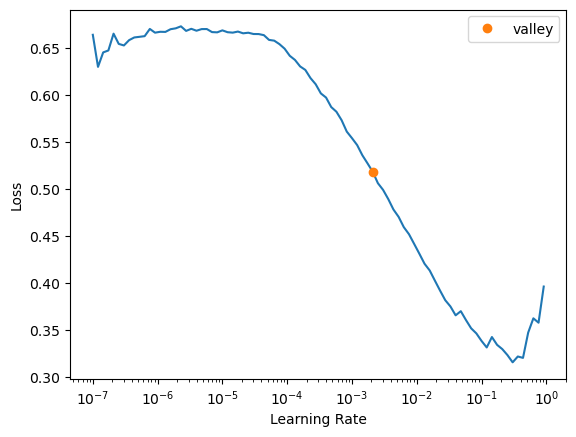

In [76]:
learn.lr_find()

In [77]:
learn.fit(3, 6e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.004728,0.017003,0.999867,00:34
1,0.000168,0.000003,1.000000,01:23
2,0.000332,0.000749,0.999934,01:21


### Inference on the test data

First, I will do the same pre-processing on the target of the test dataframe so as to give us a binary target

In [79]:
test_data['BookingsCheckedIn']=test_data['BookingsCheckedIn'].apply(func=binary_target)

In [80]:
test_data['BookingsCheckedIn'].value_counts()

0    521
1    479
Name: BookingsCheckedIn, dtype: int64

Creating test dataloader for inference

In [81]:
dl = learn.dls.test_dl(test_data)

In [82]:
learn.validate(dl=dl)

(#2) [nan,0.9929999709129333]

In [86]:
inps,preds=learn.get_preds(dl=dl)

In [87]:
test_data

,Unnamed: 0,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,82590,82591,SGP,47.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,82591,82592,SGP,16.0,11,130,483.48,155.1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,82592,82593,SGP,15.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,82593,82594,SGP,12.0,11,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82594,82595,PRT,NaN,11,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,83585,83586,ITA,54.0,0,0,0.00,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,83586,83587,IRL,47.0,0,109,327.10,277.5,0,0,...,0,0,0,0,1,0,0,0,0,0
997,83587,83588,IRL,53.0,0,0,0.00,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
998,83588,83589,IRL,85.0,0,109,981.30,9.0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
test_data.insert(loc=1,column='preds',value=np.array(preds))

In [94]:
test_data[['preds','BookingsCheckedIn']]

,preds,BookingsCheckedIn
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,1,1
997,0,0
998,1,1


In [95]:
(test_data['preds']==test_data['BookingsCheckedIn']).sum()

1000

Conclusion: the network predicted all 1000 test cases correctly